<a href="https://colab.research.google.com/github/KamilShape/emotion_recognition/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

In [1]:
#Libraries
import os
import cv2
from google.colab.patches import cv2_imshow
#----------------visualisation-------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_path = 'drive/MyDrive/faces/data'

In [3]:
people = ['smiling-person', 'anger-person', 'disgust-person', 'fear-person', 'surprise-person' ]

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
photos_number = []
for person in people:
  photos_number.append(len(os.listdir(f'{data_path}/{person}')))

In [6]:
photos_number

[1200, 1169, 1190, 1173, 1198]

### 1.1 Data visualisation

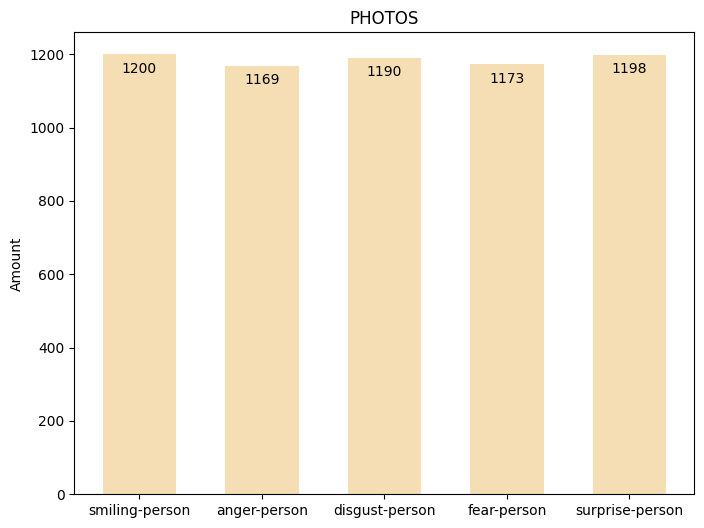

In [7]:
fig, ax = plt.subplots(figsize = (8,6))
ax.bar(people, photos_number, color='wheat', width=0.6)
ax.set_title('PHOTOS')
ax.set_ylabel('Amount')

for i in range(0, len(people)):
  ax.text(people[i], photos_number[i] - 50, horizontalalignment='center', s=photos_number[i] )

*Dataset is quite balanced.*

# **2. Train and test set**

In [8]:
train_path = 'drive/MyDrive/faces/train'

In [9]:
test_path = 'drive/MyDrive/faces/test'

In [10]:
def create_set(faces, path, new_path, set_size):
  for face in faces:
    files_folder = os.listdir(f'{path}/{face}')
    for n in range(0, round(len(files_folder)*set_size)):
      files_folder = os.listdir(f'{path}/{face}')
      photo_number = np.random.randint(len(files_folder))
      print(photo_number)
      os.makedirs(f'{new_path}/{face}', exist_ok=True)
      os.replace(f'{path}/{face}/{files_folder[photo_number]}', f'{new_path}/{face}/{files_folder[photo_number]}')

In [ ]:
#creating train set
create_set(people, data_path, train_path, 0.8)

In [12]:
#creating test set
create_set(people, data_path, train_path, 1)

217
41
123
100
128
93
29
133
200
182
125
88
126
84
209
133
22
195
190
75
165
82
41
196
195
98
24
36
100
180
90
96
115
25
57
92
169
160
161
181
21
99
121
31
64
140
146
29
88
128
97
32
109
179
85
140
53
81
68
172
166
116
104
129
73
173
142
36
85
136
55
28
147
82
139
95
68
124
136
123
109
78
123
39
91
22
6
71
148
115
108
56
144
142
115
62
108
116
111
82
49
22
89
46
76
15
43
28
96
94
78
52
52
24
86
90
115
51
76
65
99
38
103
1
112
100
27
54
102
35
4
6
87
9
79
24
58
78
31
83
64
97
50
17
1
3
41
10
30
4
48
3
41
82
76
31
58
33
81
72
7
42
49
19
29
13
27
41
44
1
48
6
23
2
27
56
0
57
41
22
37
41
19
48
23
29
13
44
46
10
7
14
40
30
25
32
30
35
41
30
20
37
35
31
10
21
20
1
30
16
3
7
18
24
24
24
17
6
14
5
10
3
2
0
0
4
7
8
2
2
5
0
2
1
1
3
2
0
0
0
103
105
10
214
104
103
54
53
58
124
35
21
202
123
116
179
70
180
114
58
5
23
188
41
139
97
167
17
24
163
187
195
149
161
187
182
3
49
54
148
103
59
21
74
155
16
101
175
103
144
179
110
169
46
56
75
77
103
116
44
130
72
17
20
146
104
129
36
19
13
14
26
28
34
16

KeyboardInterrupt: ignored

# **3. Face detection**

In [ ]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def face_recognition(photo, array):
  image = cv2.imread(photo)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face = face_classifier.detectMultiScale(gray_image, 1.3, 4)
  if len(face) > 0:
   for i, (x, y, w, h) in enumerate(face):
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
      face = image[y:y + h, x:x + w]
      array.append(face)

In [ ]:
smiling_faces = []
anger_faces = []
disgust_faces = []
fear_faces = []
surprise_faces = []
def faces_array(array, photos):
  files_folder = os.listdir(f'{data_path}/{photos}')
  for i in range(0, len(files_folder)):
    img_path = f'{data_path}/{photos}/{files_folder[i]}'
    face_recognition(img_path, array)

In [10]:
# ['smiling-person', 'anger-person', 'disgust-person', 'fear-person', 'surprise-person' ]
faces_array(smiling_faces, "smiling-person")
faces_array(anger_faces, "anger-person")
faces_array(disgust_faces, "disgust-person")
faces_array(fear_faces, "fear-person")
faces_array(surprise_faces, "surprise-person")

['u%C5%9Bmiechni%C4%99ta-m%C5%82oda-kobieta-w-dzielnicy-%C5%9Br%C3%B3dmiejskiej.jpg?s=612x612&w=0&k=20&c=JAdIUnHB89Rj4eI0URTBeGyQoaBNo9FohCIvSZnWgLk=', 'hipster-cz%C5%82owiek-w-szarym-t-shirt-studio-strza%C5%82-odosobniony.jpg?s=612x612&w=0&k=20&c=7Id05nauT2HA21OVDC4zWJL8BvKnoi0Up4UPgzTkw8s=', 'szcz%C4%99%C5%9Bliwa-roze%C5%9Bmiana-studentka-za-pomoc%C4%85-smartfona.jpg?s=612x612&w=0&k=20&c=GUhg_rhRHepe5zV-LZ7nBVj70y-by4CLID_vFdbaabc=', 'u%C5%9Bmiechni%C4%99ta-pracownica-siedzi-w-przestrzeni-coworkingowej-i-pracuje-nad-projektem.jpg?s=612x612&w=0&k=20&c=6bSx-MScIiFa4lA5_d2Re5lJ8ZglyVjTGWc4MnO5BEQ=', 'budowanie-relacji-zaufania-ze-swoimi-klientami.jpg?s=612x612&w=0&k=20&c=c7kRajPt1J6cs7uQZuelciOGurVN3yF8e8pXuHqs2og=', 'weso%C5%82a-m%C5%82oda-kobieta-robi%C4%85ca-sobie-selfie-nad-morzem.jpg?s=612x612&w=0&k=20&c=-7GAZaahbGKjqx7kkNqahHIBJ8pWWxP8lILCNyEBPgE=', 'zrelaksowana-kobieta-oddychaj%C4%85ca-%C5%9Bwie%C5%BCym-powietrzem-w-zielonym-lesie.jpg?s=612x612&w=0&k=20&c=zFNjsNzVbKaTKJzKEaUcvMd